<a href="https://colab.research.google.com/github/duskovesic/Machine-Learning/blob/main/CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uvod

U ovoj svesci je primer rešavanja problema višeklasne klasifikacije. Koristi se baza podataka „MNIST“. U bazi se nalaze slike rukom pisanih cifara koje se koriste za automatsko prepoznavanje napisane cifre. Kreirana je konvolutivna neuronska mreža sa sedam skrivenih slojeva. Prva dva skrivena sloja su konvolutivni slojevi, zatim sledi jedan sloj agregacije (Pooling sloj), dva Dropout sloja i jedan potpuno povezani sloj.


#Importovanje i setapovanje

In [30]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

from keras import backend as B
from keras import utils


#Učitavanje i obrada podataka

In [31]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [33]:
type(X_train)

numpy.ndarray

In [34]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

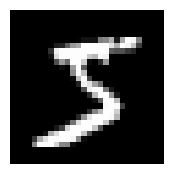

In [35]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap="gray")
plt.axis("off")
plt.show()

In [36]:
im_format = B.image_data_format()
im_format

'channels_last'

In [37]:
if im_format == "channels_first":
  X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1], X_train.shape[2])
  X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1], X_test.shape[2])
  input_shape = (1, X_train.shape[1], X_train.shape[2])
else:
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
  input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [38]:
input_shape

(28, 28, 1)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [40]:
type(X_train), type(X_train[0]), type(X_train[0][0]), type(X_train[0][0][0]), type(X_train[0][0][0][0])

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.uint8)

In [41]:
X_train = X_train / 255
X_test = X_test / 255

In [42]:
num_classes = 10
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [43]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

#Kreiranje i treniranje modela

In [44]:
model = Sequential([
    InputLayer(input_shape = input_shape),
    Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"),
    Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(rate=0.25),
    Flatten(),
    Dense(units=256, activation="relu"),
    Dropout(0.5),
    Dense(units=num_classes, activation="softmax")
])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               3211520   
                                                      

In [46]:
model.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics="accuracy")

In [47]:
batch_size = 128
num_epochs = 10

In [48]:
early_stop = EarlyStopping(monitor="val_loss", patience=2, verbose=1)

In [20]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_split=0.2, verbose=1, callbacks=early_stop)

Epoch 1/10
94/94 [==============================] - 210s 2s/step - loss: 0.3778 - accuracy: 0.8849 - val_loss: 0.0922 - val_accuracy: 0.9739
Epoch 2/10
94/94 [==============================] - 188s 2s/step - loss: 0.0958 - accuracy: 0.9715 - val_loss: 0.0583 - val_accuracy: 0.9830
Epoch 3/10
94/94 [==============================] - 182s 2s/step - loss: 0.0643 - accuracy: 0.9814 - val_loss: 0.0497 - val_accuracy: 0.9860
Epoch 4/10
94/94 [==============================] - 179s 2s/step - loss: 0.0505 - accuracy: 0.9844 - val_loss: 0.0409 - val_accuracy: 0.9872
Epoch 5/10
94/94 [==============================] - 170s 2s/step - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0400 - val_accuracy: 0.9887
Epoch 6/10
94/94 [==============================] - 168s 2s/step - loss: 0.0352 - accuracy: 0.9889 - val_loss: 0.0349 - val_accuracy: 0.9898
Epoch 7/10
94/94 [==============================] - 173s 2s/step - loss: 0.0290 - accuracy: 0.9904 - val_loss: 0.0374 - val_accuracy: 0.9892
Epoch 8/10
94

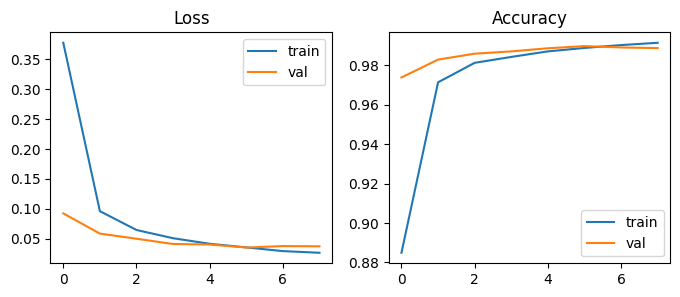

In [21]:
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.title("Loss")
plt.plot(history.epoch, history.history["loss"], label="train")
plt.plot(history.epoch, history.history["val_loss"], label="val")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy")
plt.plot(history.epoch, history.history["accuracy"], label="train")
plt.plot(history.epoch, history.history["val_accuracy"], label="val")
plt.legend()

plt.show()

#Analiza modela

In [22]:
model.metrics_names

['loss', 'accuracy']

In [23]:
scores = model.evaluate(X_test, y_test)
print("loss:", scores[0])
print("accuracy:", scores[1])

313/313 [==============================] - 10s 30ms/step - loss: 0.0300 - accuracy: 0.9903
loss: 0.029957391321659088
accuracy: 0.9902999997138977


In [24]:
y_predict = model.predict(X_test)

313/313 [==============================] - 10s 32ms/step


In [25]:
y_predict, y_test, y_predict.shape

(array([[3.29777594e-10, 2.47753196e-09, 1.40457416e-07, ...,
         9.99996960e-01, 8.50304382e-10, 8.55760277e-07],
        [4.60708875e-08, 4.52873035e-04, 9.99547064e-01, ...,
         1.93127302e-11, 8.33143901e-11, 5.30511642e-11],
        [4.82945843e-08, 9.99981821e-01, 3.38850754e-07, ...,
         1.26699251e-05, 2.84849239e-06, 3.22984626e-08],
        ...,
        [4.31765965e-14, 1.29997355e-08, 1.07721633e-12, ...,
         2.23127206e-08, 2.08010746e-08, 1.50398947e-07],
        [4.41150033e-11, 5.54202474e-12, 4.68602259e-15, ...,
         4.87970385e-12, 5.53596983e-05, 3.44032268e-11],
        [1.44057793e-07, 7.35939709e-09, 2.07316742e-08, ...,
         8.26940946e-12, 9.51182741e-08, 2.67021460e-10]], dtype=float32),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dt

In [26]:
y_predict_class = np.argmax(y_predict, axis=1)
y_predict_class

array([7, 2, 1, ..., 4, 5, 6])

In [27]:
y_test_class = np.argmax(y_test, axis=1)
y_test_class

array([7, 2, 1, ..., 4, 5, 6])

In [28]:
conf_matrix = confusion_matrix(y_test_class, y_predict_class)
print(conf_matrix)

[[ 978    0    0    1    0    0    1    0    0    0]
 [   0 1133    1    0    0    0    0    0    1    0]
 [   2    3 1018    2    1    0    0    3    3    0]
 [   0    0    0 1005    0    2    0    1    2    0]
 [   0    1    0    0  975    0    0    0    0    6]
 [   2    0    0    7    0  877    3    0    2    1]
 [   7    2    0    0    1    1  944    0    3    0]
 [   1    3    6    1    0    0    0 1013    1    3]
 [   2    0    2    0    0    0    0    1  965    4]
 [   0    1    0    0    6    3    0    2    2  995]]


In [29]:
report = classification_report(y_test_class, y_predict_class)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

